# Visualization exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# colors
demblue = "#0015BC"
repred = "#FF0000"
demgrey = "#9EA4BF"
repgrey = "#BF9EA2"

## 1. Histogram

**Task 1.1:** Use the `histplot` function of the package `seaborn` to visualize how the share of belief-speaking changed for democrats between the time period 2010-2013 and 2019-2022. How did it change for republicans?

**Hint:** You can use the argument `hue` of the `histplot` function to create a separate histogram for each time period in the same plot. See also the function's [documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html).

In [3]:
# read the data frame with information about individual Congress Members
users = pd.read_csv("data/users.csv", dtype={"author_id":str})

# histplot() requires "long-form" data, we therefore reshape the data frame
# to match the required input
belief = pd.melt(
    users, 
    id_vars=["handle", "author_id", "party"],
    value_vars=["belief_share_2010_to_2013", "belief_share_2019_to_2022"],
    var_name="time_period",
    value_name="share"
)

# rename the values in the newly created "time_period" column to contain only
# the required information
belief["time_period"] = belief["time_period"].replace({
    "belief_share_2010_to_2013":"2010 to 2013",
    "belief_share_2019_to_2022":"2019 to 2022"
})

belief.tail(3)

,handle,author_id,party,time_period,share
2051,RodneyDavis,993153006,Republican,2019 to 2022,0.057344
2052,RepDelBene,995193054,Democrat,2019 to 2022,0.052866
2053,RepDLesko,996094929733652480,Republican,2019 to 2022,0.049877


In [4]:
def plot_histogram(ax, data, palette, title, legend=False):
    sns.histplot(
        data=data, 
        x="share", 
        hue="time_period",
        hue_order=["2010 to 2013", "2019 to 2022"],
        palette=palette,
        ax=ax,
        shrink=.8,
        edgecolor=None,
        multiple="dodge",
        legend=legend
    )
    ax.set_title(title)

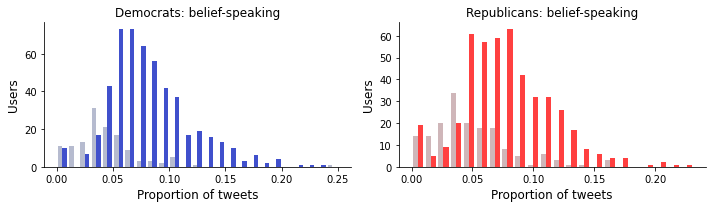

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

plot_histogram(
    axes[0], 
    belief[belief["party"] == "Democrat"], 
    [demgrey, demblue],
    "Democrats: belief-speaking",
)
plot_histogram(
    axes[1], 
    belief[belief["party"] == "Republican"], 
    [repgrey, repred],
    "Republicans: belief-speaking"
)

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("Proportion of tweets", fontsize=12)
    ax.set_ylabel("Users", fontsize=12)
    
fig.tight_layout()

**Task 1.2 (optional):** Instead of the `histplot` function use the `kdeplot` function to visualize the distributions. When does it make sense to use a KDE plot instead of a histogram?

In [8]:
def plot_kde(ax, data, palette, title, legend=False):
    sns.kdeplot(
        data=data, 
        x="share", 
        hue="time_period",
        hue_order=["2010 to 2013", "2019 to 2022"],
        fill=True,
        palette=palette,
        ax=ax,
        legend=legend
    )
    ax.set_title(title)

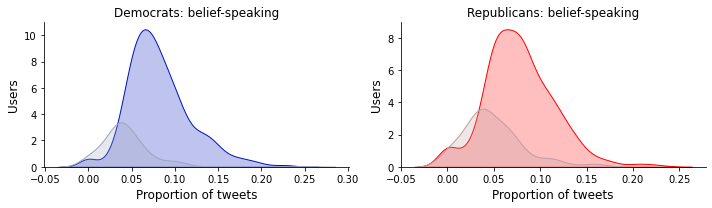

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

plot_kde(
    axes[0], 
    belief[belief["party"] == "Democrat"], 
    [demgrey, demblue],
    "Democrats: belief-speaking",
)
plot_kde(
    axes[1], 
    belief[belief["party"] == "Republican"], 
    [repgrey, repred],
    "Republicans: belief-speaking"
)

for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("Proportion of tweets", fontsize=12)
    ax.set_ylabel("Users", fontsize=12)
    
fig.tight_layout()

**Task 1.3 (optional):** Create a 2x2 grid to show how the proportion of belief-speaking and truth-seeking tweets changed for republicans and democrats between 2010-2013 and 2019-2022.

In [10]:
truth = pd.melt(
    users, 
    id_vars=["handle", "author_id", "party"],
    value_vars=["truth_share_2010_to_2013", "truth_share_2019_to_2022"],
    var_name="time_period",
    value_name="share"
)
truth["time_period"] = truth["time_period"].replace({
    "truth_share_2010_to_2013":"2010 to 2013",
    "truth_share_2019_to_2022":"2019 to 2022"
})

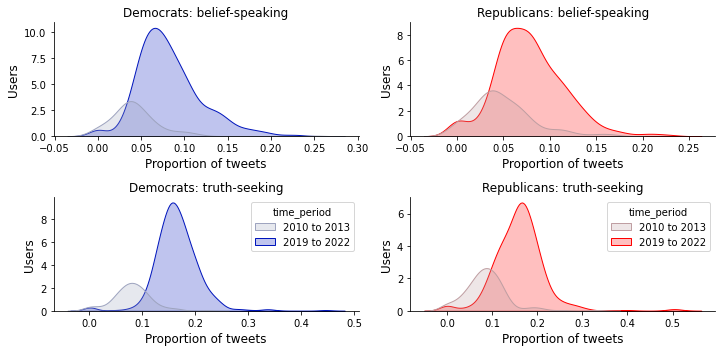

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

plot_kde(
    axes[0][0], 
    belief[belief["party"] == "Democrat"], 
    [demgrey, demblue],
    "Democrats: belief-speaking",
)
plot_kde(
    axes[0][1], 
    belief[belief["party"] == "Republican"], 
    [repgrey, repred],
    "Republicans: belief-speaking"
)
plot_kde(
    axes[1][0], 
    truth[truth["party"] == "Democrat"], 
    [demgrey, demblue],
    "Democrats: truth-seeking",
    legend=True
)
plot_kde(
    axes[1][1], 
    truth[truth["party"] == "Republican"], 
    [repgrey, repred],
    "Republicans: truth-seeking",
    legend=True
)


for ax in axes.flatten():
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("Proportion of tweets", fontsize=12)
    ax.set_ylabel("Users", fontsize=12)
    
fig.tight_layout()

## 2. Bar chart

**Task 2.1:** The data frame `topics` contains information about the proportion of belief-speaking and truth-seeking that Democrats and Republicans use when discussing different topics. Use the `barplot` function of the package `seaborn` to visualize the share of both honesty components for the topics "abortion", "gun", "vaccine" and "putin", differentiaded by party. For which topics do the Republicans use more belief-speaking? For which the Democrats?

In [13]:
topics = pd.read_csv("data/topics.csv")
topics.head(10)

,component,party,proportion,topic_name
0,belief-speaking,Democrat,0.071420,abortion $\vert$ woman $\vert$ right $\vert$ life
1,truth-seeking,Democrat,0.099941,abortion $\vert$ woman $\vert$ right $\vert$ life
2,belief-speaking,Republican,0.094262,abortion $\vert$ woman $\vert$ right $\vert$ life
3,truth-seeking,Republican,0.111906,abortion $\vert$ woman $\vert$ right $\vert$ life
4,belief-speaking,Democrat,0.054801,gun $\vert$ violence $\vert$ background $\vert...
5,truth-seeking,Democrat,0.108535,gun $\vert$ violence $\vert$ background $\vert...
6,belief-speaking,Republican,0.089088,gun $\vert$ violence $\vert$ background $\vert...
7,truth-seeking,Republican,0.140884,gun $\vert$ violence $\vert$ background $\vert...
8,belief-speaking,Democrat,0.069394,vaccine $\vert$ vaccinate $\vert$ mandate $\ve...
9,truth-seeking,Democrat,0.252456,vaccine $\vert$ vaccinate $\vert$ mandate $\ve...


In [14]:
belief_speaking = topics[topics["component"] == "belief-speaking"][0:8].copy()
belief_speaking["proportion"] = belief_speaking["proportion"] * 100

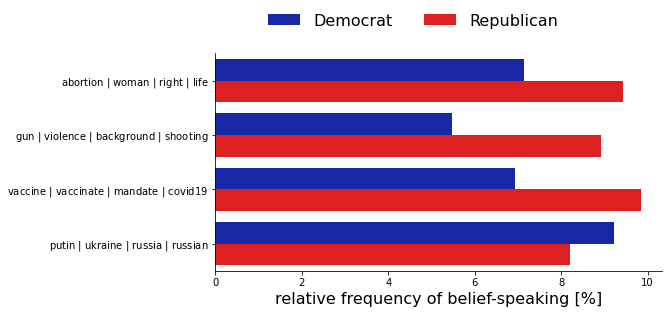

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(
    data=belief_speaking,
    x="proportion", 
    y="topic_name",
    hue="party",
    ax=ax,
    palette=[demblue, repred], 
    hue_order=["Democrat", "Republican"]
)

ax.set_ylabel("")
ax.set_xlabel("relative frequency of belief-speaking [%]", fontsize=16)
legend = ax.legend(loc=1, bbox_to_anchor=[0.8, 1.25, 0, 0], fontsize=16, ncol=2, frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

**Task 2.2 (optional):** The file `mean_corpus_values.csv` contains the mean values for belief-speaking and truth-seeking for the full corpus of tweets. Load the file into a data frame and plot two lines (one for each party) indicating the mean level of belief-speaking in the corpus. For which topics is the proportion of belief-speaking above average? For which below?

In [16]:
mean_corpus_values = pd.read_csv("data/mean_corpus_values.csv")
mean_corpus_values = mean_corpus_values.set_index(["component", "party"])

In [17]:
mean_corpus_values

corpus_mean
component       party                  
belief-speaking Democrat       8.216097
                Republican     7.643007
truth-seeking   Democrat      18.290874
                Republican    16.600150

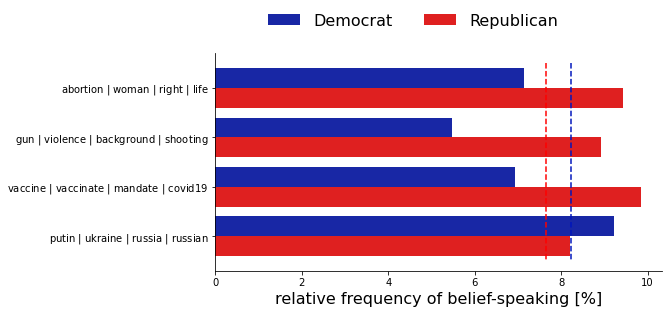

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(
    data=belief_speaking[0:8],
    x="proportion", 
    y="topic_name",
    hue="party",
    ax=ax,
    palette=[demblue, repred], 
    hue_order=["Democrat", "Republican"]
)

ax.set_ylabel("")
ax.set_xlabel("relative frequency of belief-speaking [%]", fontsize=16)
legend = ax.legend(loc=1, bbox_to_anchor=[0.8, 1.25, 0, 0], fontsize=16, ncol=2, frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

N_topics = len(belief_speaking["topic_name"].unique())
value = mean_corpus_values.loc["belief-speaking", "Democrat"]
ax.plot([value, value], [-0.5, N_topics - 0.5],
         '--', color=demblue, zorder=2)
value = mean_corpus_values.loc["belief-speaking", "Republican"]
ax.plot([value, value], [-0.5, N_topics - 0.5],
         '--', color=repred, zorder=2)

**Task 2.3 (optional):** Create two bar plots next to each other, one for belief-speaking and one for truth-seeking, this time showing all 20 topics contained in the `topics` data frame. Which topics have the highest difference in belief-speaking and truth-seeking between the parties?

In [19]:
def plot_bar(ax, data, component, legend=False):
    df = data[data["component"] == component].copy()
    df["proportion"] = df["proportion"] * 100
    
    sns.barplot(
        data=df,
        x="proportion", 
        y="topic_name",
        hue="party",
        ax=ax,
        palette=[demblue, repred], 
        hue_order=["Democrat", "Republican"],
    )

    ax.set_ylabel("")
    ax.set_xlabel(f"relative frequency of\n{component} [%]", fontsize=12)
    if legend:
        legend = ax.legend(loc=4, fontsize=12, frameon=False)
    else:
        ax.legend_.remove()
        
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    N_topics = len(df["topic_name"].unique())
    for party, color in zip(["Democrat", "Republican"], [demblue, repred]):
        value = mean_corpus_values.loc[component, party]
        ax.plot([value, value], [-0.5, N_topics - 0.5],
                 '--', color=color, zorder=2)
        
    ax.set_ylim(-0.5, N_topics - 0.5)

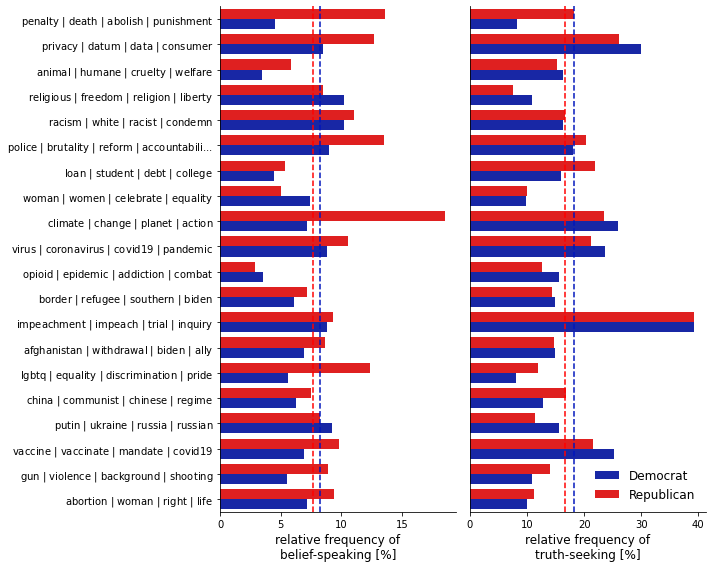

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
plot_bar(axes[0], topics, "belief-speaking", legend=False)
plot_bar(axes[1], topics, "truth-seeking", legend=True)
axes[1].set_yticks([])
fig.tight_layout()

## 3. Time series

**Task 3.1:** The files `belief.csv` and `truth.csv` contain the mean proportion of belief-speaking and truth-seeking tweets for every month since 2022-01-01, split by Democrats and Republicans. Create a figure with two vertically stacked panels. Plot the time-series of belief-speaking split by party in the first panel, and the time-series of truth-seeking in the panel below. Apply a rolling average of three months to the data to smooth the time-series. 

**Task 3.2:** The data frames also contain the 95% confidence intervals of the time-series generated through bootstrapping (columns `perc_2.5` and `perc_97.5`). Plot a shaded area indicating the confidence interval around the mean value.  

**Hint:** You can use matplotlib's `fill_between()` function to plot a shaded area between two lines. You can modify the transparency of the area using the `alpha` function argument (see also the function's [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html)).

**Task 3.3:** Indicate the dates of the presidential elections in 2016 and 2020 in the plot. What can you say about the trend of belief-speaking and truth-seeking after the presidential elections?

In [21]:
belief = pd.read_csv("data/belief.csv", parse_dates=["date"])
truth = pd.read_csv("data/truth.csv", parse_dates=["date"])
belief.head(2)

,party,mean,perc_2.5,perc_97.5,date
0,Democrat,0.066411,0.036199,0.097674,2011-01-01
1,Republican,0.062301,0.041096,0.080412,2011-01-01


In [22]:
def plot_timeseries(ax, df, color, label):
    ax.plot(df["date"], df["mean"].rolling(3).mean(),
            color=color, label=label)
    ax.fill_between(df["date"], 
                    df["perc_2.5"].rolling(3).mean(),
                    df["perc_97.5"].rolling(3).mean(),
                    color=color, alpha=0.2)

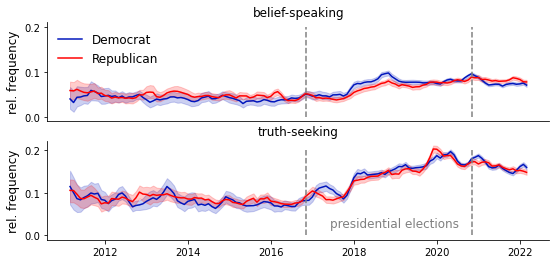

In [23]:
figx, axes = plt.subplots(2, 1, figsize=(9, 4))

ax = axes[0]
dem = belief[belief["party"] == "Democrat"]
rep = belief[belief["party"] == "Republican"]
plot_timeseries(ax, dem, demblue, "Democrat")
plot_timeseries(ax, rep, repred, "Republican")
ax.set_title("belief-speaking")
ax.set_xticks([])
ax.legend(frameon=False, fontsize=12)

ax = axes[1]
dem = truth[truth["party"] == "Democrat"]
rep = truth[truth["party"] == "Republican"]
plot_timeseries(ax, dem, demblue, "Democrat")
plot_timeseries(ax, rep, repred, "Republican")
ax.set_title("truth-seeking")
ax.text(pd.to_datetime("2017-06-01"), 0.02,
    "presidential elections", fontsize=12, color="grey")

election1 = pd.to_datetime("2016-11-08")
election2 = pd.to_datetime("2020-11-03")
for ax in axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel("rel. frequency", fontsize=12)
    ax.set_yticks([0, 0.1, 0.2])
    ax.plot([election1, election1], [0, 0.2], "--", color="grey")
    ax.plot([election2, election2], [0, 0.2], "--", color="grey")

## 4. Scatter plot

**Task 4.1:** The `users.csv` dataset contains information about the average [NewsGuard](https://www.newsguardtech.com/) score of links posted by each Congress Member (column `NG_score_mean`). Use `seaborn`'s `scatterplot()` function to find out if the share of belief-speaking over the whole observation period (column `belief_share`) is correlated to the average NewsGuard score.

In [24]:
users = pd.read_csv(
    "data/users.csv", 
    dtype={"author_id":str},
    parse_dates=["created_at"]
)
users = users[users["party"].isin(["Democrat", "Republican"])]
users["belief_share"] = users["belief_share"] * 100
users.head(2)

,handle,author_id,name,party,N_tweets,followers_count,following_count,tweet_count,created_at,congress,NG_score_mean,belief_share,truth_share,belief_share_2010_to_2013,truth_share_2010_to_2013,belief_share_2019_to_2022,truth_share_2019_to_2022,ideology_mean,followers_count_log,following_count_log
0,RepLipinski,1009269193,Former Rep. Daniel Lipinski,Democrat,3179,19893.0,2478.0,4359.0,2012-12-13 17:03:06+00:00,116.0,93.193439,5.067698,0.188008,NaN,NaN,0.053934,0.214467,0.471657,9.898123,7.815207
1,CaptClayHiggins,1011053278304592000,Clay Higgins,Republican,21,3289.0,156.0,24.0,2018-06-25 01:07:40+00:00,116.0,NaN,0.000000,0.230769,NaN,NaN,0.000000,0.181818,0.282969,8.098339,5.049856


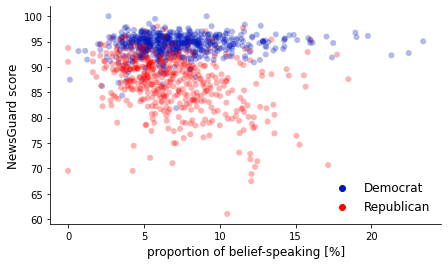

In [25]:
fig, ax = plt.subplots(figsize=(7, 4))
grid = sns.scatterplot(
    data=users, 
    x="belief_share", 
    y="NG_score_mean", 
    hue="party",
    palette=[demblue, repred],
    hue_order=["Democrat", "Republican"],
    alpha=0.3,
    linewidth=0,
    ax=ax
)

ax.set_xlabel("proportion of belief-speaking [%]", fontsize=12)
ax.set_ylabel("NewsGuard score", fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False, loc=4, fontsize=12)

**Task 4.2 (optional):** Use the package `statsmodels` to perform an ordinary least squares regression of the form  

`NG_score_mean ~ belief_share + truth_share + party + party * belief_share + party * truth_share`.

How does the NewsGuard score chage if the proportion of belief-speaking increases by 10%? How does the score behave if the proportion of truth-seeking increases by 10%?

In [26]:
import statsmodels.formula.api as smf

In [27]:
formula = 'NG_score_mean ~ belief_share + truth_share + party + party * belief_share + party * truth_share'
mod = smf.ols(formula=formula, data=users)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          NG_score_mean   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     192.5
Date:                Sun, 17 Jul 2022   Prob (F-statistic):          4.18e-144
Time:                        09:43:04   Log-Likelihood:                -2824.9
No. Observations:                1017   AIC:                             5662.
Df Residuals:                    1011   BIC:                             5691.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           92.4329      0.673    137.276      0.000      91.112      93.754
party[T.Republican]                 -1.6266      0.887     -1.834      0.067      -3.367       0.113
belief_share                         0.0094      0.057      0.165      0.869      -0.103       0.122
party[T.Republican]:belief_share    -0.6802      0.090     -7.595      0.000      -0.856      -0.504
truth_share                         12.9640      4.457      2.909      0.004       4.218      21.710
party[T.Republican]:truth_share     -4.8077      6.342     -0.758      0.449     -17.252       7.637
==============================================================================
Omnibus:                      238.010   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1089.416
Skew:                          -1.014   Prob(JB):                    2.73e-237
Kurtosis:                       7.647   Cond. No.                         520.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Task 4.3 (optional):** Use the fitted OLS regression model to make predictions of the NewsGuard score for a range of proportions of belief-speaking from 0% to 30%. Get the 95% confidence intervals for the predictions. Visualize the predictions including their confidence intervals on top of the scatterplot.

**Hint:** Use the function `get_prediction()` of the fitted model to get the predictions. Use the function `summary_frame()` on the predictions to get the confidence intervals.

In [28]:
belief_proportion = np.arange(0, 30.1, 1)
N = len(belief_proportion)
belief_pred_df_dem = pd.DataFrame({
    "belief_share":belief_proportion,
    "party":["Democrat"] * N,
    "truth_share":[users["truth_share"].mean()] * N
})
belief_pred_df_rep = pd.DataFrame({
    "belief_share":belief_proportion,
    "party":["Republican"] * N,
    "truth_share":[users["truth_share"].mean()] * N
})

In [29]:
belief_pred_dem = res.get_prediction(belief_pred_df_dem)
belief_pred_rep = res.get_prediction(belief_pred_df_rep)

belief_pred_dem = belief_pred_dem.summary_frame(alpha=0.05)
belief_pred_rep = belief_pred_rep.summary_frame(alpha=0.05)

In [30]:
def plot_scatter(ax, df):
    sns.scatterplot(
        data=users, 
        x="belief_share", 
        y="NG_score_mean", 
        hue="party",
        palette=[demblue, repred],
        hue_order=["Democrat", "Republican"],
        alpha=0.3,
        linewidth=0,
        ax=ax
    )

    ax.set_xlabel("proportion of belief-speaking [%]", fontsize=12)
    ax.set_ylabel("NewsGuard score", fontsize=12)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(frameon=False, loc=4, fontsize=12)

In [33]:
def plot_prediction(ax, preds, x):
    parties = ["Democrat", "Republican"]
    colors = [demblue, repred]    
    for pred, color, party in zip(preds, colors, parties):
        pred = pred.iloc[0:len(x)]
        ax.plot(x, pred["mean"], color=color, label=party)
        ax.fill_between(x, pred["mean"], pred["mean_ci_lower"], 
                        alpha=0.2, color=color)
        ax.fill_between(x, pred["mean"], pred["mean_ci_upper"], 
                        alpha=0.2, color=color)

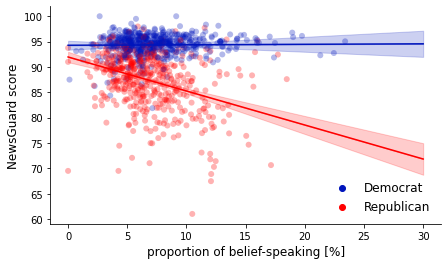

In [34]:
fig, ax = plt.subplots(figsize=(7, 4))
plot_scatter(ax, users)

plot_prediction(
    ax,
    (belief_pred_dem, belief_pred_rep),
    belief_proportion, 
)